# COMP6247(2020/21): Reinforcement and Online Learning

## Part I: Radial Basis Functions

### Predicting Next Day Temperature

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Bias_correction_ucl.csv")

In [75]:
df = df.drop(["Date", "Next_Tmin"], axis = 1) #useless columns

In [76]:
df=(df-df.min())/(df.max()-df.min()) #normalising

In [77]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000
mean,0.500000,0.555012,0.641132,0.469512,0.716896,0.573138,0.602080,0.222149,0.335253,0.381249,...,0.024977,0.022431,0.017562,0.016175,0.468864,0.535266,0.247533,0.228077,0.608391,0.598832
std,0.300482,0.168750,0.129783,0.186309,0.175142,0.140897,0.152824,0.115090,0.148582,0.271336,...,0.082095,0.081530,0.073341,0.072422,0.266692,0.257072,0.271446,0.269785,0.258005,0.145489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.443182,0.559140,0.332387,0.615787,0.480394,0.509366,0.147358,0.224080,0.151615,...,0.000000,0.000000,0.000000,0.000000,0.286017,0.359223,0.081664,0.034022,0.402494,0.502326
50%,0.500000,0.562500,0.650538,0.447661,0.751444,0.577439,0.618215,0.193143,0.310411,0.326377,...,0.000000,0.000000,0.000000,0.000000,0.500530,0.546926,0.166759,0.102274,0.665409,0.609302
75%,0.750000,0.681818,0.731183,0.601999,0.847639,0.673390,0.708964,0.271393,0.430923,0.594957,...,0.002216,0.000849,0.000498,0.000002,0.643008,0.699029,0.237354,0.328623,0.840938,0.706977
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df = df.dropna() #dropping nans

In [79]:
df.shape

(7588, 23)

## Linear Regression

In [80]:
rawData = X_train
N, pp1 = rawData.shape
# Last column is target
X = np.matrix(X_train)
y = np.matrix(y_train).T


print(X.shape, y.shape)

w = (np.linalg.inv(X.T*X)) * X.T * y #linear regression
yh_lin = X*w
np.linalg.norm(y-yh_lin)

(5691, 22) (5691, 1)


5.276000190727046

## RBFs

In [83]:
from sklearn.cluster import KMeans
J = 20;
kmeans = KMeans(n_clusters=J, random_state=0).fit(X)
sig = np.std(X)


U = np.zeros((N,J))

for i in range(N):
    for j in range(J):
        U[i][j] = np.exp(-0.5 *np.linalg.norm(X[i] - kmeans.cluster_centers_[j])/sig)



In [84]:
wopt = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) * y
np.linalg.norm(y-U@wopt)

4.858993369946314

In [87]:
w = np.random.rand(J,1)
loss = []
lr = 0.07
epochs = 10
for i in range(epochs):
    if i == 5:
        lr = 0.01
    print("Epoch: ", i, "/", epochs)
    permut = np.random.permutation(U.shape[0])

    for i in permut:

        Y_pred = U[i] @ w
        jw = lr*U[i].T * np.asarray((y[i] - Y_pred))[0]
        w += (lr * jw).reshape(J, 1)
        loss.append(np.linalg.norm(y - U @ w))

yh_rbf = np.dot(U,w)

wopt = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) * y

print("SGD: ", np.linalg.norm(y-yh_rbf), "Pseudo Inverse: ", np.linalg.norm(y-U@wopt))

Epoch:  0 / 10
Epoch:  1 / 10
Epoch:  2 / 10
Epoch:  3 / 10
Epoch:  4 / 10
Epoch:  5 / 10
Epoch:  6 / 10
Epoch:  7 / 10
Epoch:  8 / 10
Epoch:  9 / 10
SGD:  7.646912351045207 Pseudo Inverse:  4.858993369946314


In [88]:
w = np.random.rand(X.shape[1],1)
loss = []
lr = 0.07
epochs = 10
for i in range(epochs):
    if i == 5:
        lr = 0.01
    print("Epoch: ", i, "/", epochs)
    permut = np.random.permutation(X.shape[0])

    for i in permut:

        Y_pred = X[i] @ w
        jw = lr*X[i].T * np.asarray((y[i] - Y_pred))[0]
        w += (lr * jw).reshape(X.shape[1], 1)
        loss.append(np.linalg.norm(y - X @ w))

yh_reg = np.dot(X,w)
w = (np.linalg.inv(X.T*X)) * X.T * y #linear regression

print("SGD: ", np.linalg.norm(y-yh_reg), "Pseudo Inverse: ", np.linalg.norm(y-X@w))

Epoch:  0 / 10
Epoch:  1 / 10
Epoch:  2 / 10
Epoch:  3 / 10
Epoch:  4 / 10
Epoch:  5 / 10
Epoch:  6 / 10
Epoch:  7 / 10
Epoch:  8 / 10
Epoch:  9 / 10
SGD:  7.878578214213912 Pseudo Inverse:  5.276000190727046


In [107]:
errors = [[np.linalg.norm(y-yh_reg),np.linalg.norm(y-X@w)], 
          [np.linalg.norm(y-yh_rbf), np.linalg.norm(y-U@wopt)]]


In [108]:
errors

[[7.878578214213912, 5.276000190727046],
 [7.646912351045207, 4.858993369946314]]

Text(0.5, 0, 'Number of Basis Functions')

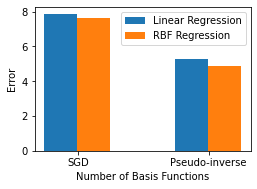

In [112]:
import numpy as np
import matplotlib.pyplot as plt

names = ["SGD", "Pseudo-inverse"]

fig = plt.figure(figsize = (3,2))
ax = fig.add_axes([0,0,1,1])

ax.bar(np.arange(len(names)) + 0.25, errors[0], width = 0.25, label = "Linear Regression")
ax.bar(np.arange(len(names)) + 0.5, errors[1], width = 0.25, label = "RBF Regression")


x = np.arange(len(names))+0.38  # the label locations
ax.set_xticks(x)
ax.set_xticklabels(names)#,  fontsize =15)

plt.legend()#fontsize = 15)
plt.ylabel("Error")#,fontsize = 15)
plt.xlabel("Number of Basis Functions")#,fontsize = 15)

Text(0, 0.5, 'Loss')

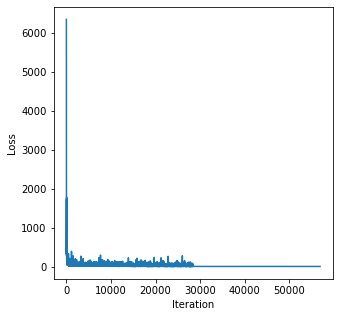

In [44]:
plt.figure(figsize = (5,5))
plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")

5.234338068260887 8.502886159639873


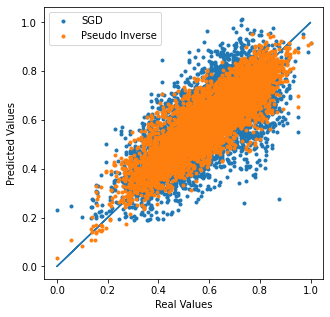

In [16]:
plt.figure(figsize = (5,5))
plt.plot(y, yh_rbf, ".", label = "SGD")

plt.plot(y, y, c = "C0")
plt.plot(y, U@wopt, ".", label = "Pseudo Inverse")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
print(np.linalg.norm(y-yh_lin), np.linalg.norm(y-yh_rbf))
plt.legend()

## Mountain Car Control Problem, Discrete States

### RBF AND SGD

In [5]:
def discretization(env, obs):
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_den = (env_high - env_low) / n_states
    pos_den = env_den[0]
    vel_den = env_den[1]
    pos_high = env_high[0]
    pos_low = env_low[0]
    vel_high = env_high[1]
    vel_low = env_low[1]
    pos_scaled = int((obs[0] - pos_low) / pos_den)
    vel_scaled = int((obs[1] - vel_low) / vel_den)
    return pos_scaled, vel_scaled

## Q Learning to get a table

In [4]:
import gym
import numpy as np
env_name = "MountainCar-v0"
env = gym.make(env_name)
obs = env.reset()
env.render()
# Some initializations
#
n_states = 40
episodes = 10
initial_lr = 1.0
min_lr = 0.005
gamma = 0.99
max_stps = 300
epsilon = 0.05
env = env.unwrapped
env.seed()
np.random.seed(0)

# Quantize the states
#

def discretization(env, obs):
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_den = (env_high - env_low) / n_states
    pos_den = env_den[0]
    vel_den = env_den[1]
    pos_high = env_high[0]
    pos_low = env_low[0]
    vel_high = env_high[1]
    vel_low = env_low[1]
    pos_scaled = int((obs[0] - pos_low) / pos_den)
    vel_scaled = int((obs[1] - vel_low) / vel_den)
    return pos_scaled, vel_scaled

q_table = np.zeros((n_states, n_states, env.action_space.n))
tabular_steps = []

for episode in range(episodes):
    
    # by solving bellmans equations for a number of episodes we can optain a value function of that policy at every state
    # we can improve the policy (what is the action im going to take given a state)
    

    obs = env.reset()
    total_reward = 0
    alpha = max(min_lr, initial_lr*(gamma**(episode//100)))
    print("Episode:", episode, alpha)
    steps = 0
    while True:
#         env.render()
        pos, vel = discretization(env, obs)
        if np.random.uniform(low=0, high=1) < epsilon:
            a = np.random.choice(env.action_space.n)
        else:
            a = np.argmax(q_table[pos][vel])
        obs, reward, terminate,_ = env.step(a)
        total_reward += abs(obs[0]+0.5)
        pos_, vel_ = discretization(env, obs)
        
        
        
        # Q function update
        q_table[pos][vel][a] = (1-alpha)*q_table[pos][vel][a] + alpha*(reward+gamma*np.max(q_table[pos_][vel_]))
        
        
        
        # value : the optimum action i can take is the reward that i get from taking that action + 
        # gamma x the optimum I can gather as value from where I go
        steps += 1
        if terminate:
            tabular_steps.append(steps)
            print(steps)
            break
# while True:
#     env.render()

Episode: 0 1.0
29289
Episode: 1 1.0
4049
Episode: 2 1.0
4627
Episode: 3 1.0
2140
Episode: 4 1.0
3719
Episode: 5 1.0
2291
Episode: 6 1.0
1109
Episode: 7 1.0
1494
Episode: 8 1.0
2676
Episode: 9 1.0
2919


In [5]:
env.close()

In [6]:
q_table.shape

(40, 40, 3)

In [7]:
values = []
for pos in range(len(q_table)):
    for vel in range(len(q_table[pos])):
#         print(q_table[pos][vel])
        values.append([pos, vel, q_table[pos][vel][0], q_table[pos][vel][1], q_table[pos][vel][2]])

In [8]:
df_values = pd.DataFrame(values)

In [9]:
df_values.to_csv("data1000eps2.csv")

In [10]:
df_values.shape

(1600, 5)

## MEANS OF BASIS FUNCTIONS

In [14]:
df_values = pd.read_csv("data1000eps2.csv", index_col = 0)

In [15]:
df_values.columns = ["pos", "vel", "a1", "a2", "a3"]

In [16]:
df_values.head()

,pos,vel,a1,a2,a3
0,0,0,0.000000,0.0,0.0
1,0,1,0.000000,0.0,0.0
2,0,2,-14.854223,0.0,0.0
3,0,3,0.000000,0.0,0.0
4,0,4,-7.725531,0.0,0.0


In [17]:
X = df_values.values[:, :2]
sig = np.std(X)

In [17]:
def kmean_cluster(J):
    from sklearn.cluster import KMeans

    X = df_values.values[:, :2]
    N = len(df_values)
    kmeans = KMeans(n_clusters=J, random_state=0).fit(X)
    sig = np.std(X)

    U = np.zeros((N,J))

    for i in range(N):
        for j in range(J):
            U[i][j] = np.exp(-np.linalg.norm(X[i] - kmeans.cluster_centers_[j])/sig)

    return(U, kmeans.cluster_centers_)

In [18]:
U, k =  kmean_cluster(50)

In [19]:
k.shape, U.shape

((50, 2), (1600, 50))

In [18]:
def get_means(J):
    X = df_values.values[:, :2]
    means = []
    N = len(df_values)
    sig = np.std(X)
    
    for i in range(2):
        means.append(np.linspace(X[:, i].min(), X[:, i].max(), J))
    means  = np.array(means).T
    
    U = np.zeros((N,J))

    for i in range(N):
        for j in range(J):
            U[i][j] = np.exp(-np.linalg.norm(X[i] - means[j])/(sig))
    
    return(U, means)

In [19]:
U, means = get_means(100)

In [22]:
# y =  df_values.values[:, -3:]
# # print(y.shape)

# wopt = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) @ y
# print(np.linalg.norm(y-np.dot(U,wopt)))

In [23]:
def random_means(J):
    X = df_values.values[:, :2]
    means = []
    N = len(df_values)
    sig = np.std(X)
    
    for i in range(2):
        means.append(np.random.rand(J) * X[:, i].max())
    means  = np.array(means).T
    
    U = np.zeros((N,J))

    for i in range(N):
        for j in range(J):
            U[i][j] = np.exp(-np.linalg.norm(X[i] - means[j])/sig)
    
    return(U, means)

In [24]:
# U, means = random_means(100)

In [25]:
# y =  df_values.values[:, -1]
# sig = np.std(X)
# print(y.shape)

# wopt = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) @ y
# print(np.linalg.norm(y-np.dot(U,wopt)))

In [26]:
def discretization(env, obs):
    n_states = 40
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_den = (env_high - env_low) / n_states
    pos_den = env_den[0]
    vel_den = env_den[1]
    pos_high = env_high[0]
    pos_low = env_low[0]
    vel_high = env_high[1]
    vel_low = env_low[1]
    pos_scaled = int((obs[0] - pos_low) / pos_den)
    vel_scaled = int((obs[1] - vel_low) / vel_den)
    return pos_scaled, vel_scaled

In [27]:
U.shape

(1600, 100)

In [19]:

y =  df_values.values[:, -3:]

means_res = []
for mean in [kmean_cluster, get_means, random_means]:
    res = []
    for clusters in [ 10, 30, 50]:
        res_cl = []
        for iters in range(5):
            U, kmeans = mean(clusters)
            wopt = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) @ y
#             print(wopt.shape)
            result = np.linalg.norm(y-np.dot(U,wopt))
            res_cl.append(result)
            print("CLUSTER CENTERS: ", clusters, "Iter: ", iters, "/", 5, "Res: ", result)
        res.append(res_cl)
    means_res.append(res)

CLUSTER CENTERS:  10 Iter:  0 / 5 Res:  746.0836479498428
CLUSTER CENTERS:  10 Iter:  1 / 5 Res:  746.0836479498428
CLUSTER CENTERS:  10 Iter:  2 / 5 Res:  746.0836479498428
CLUSTER CENTERS:  10 Iter:  3 / 5 Res:  746.0836479498428
CLUSTER CENTERS:  10 Iter:  4 / 5 Res:  746.0836479498428
CLUSTER CENTERS:  30 Iter:  0 / 5 Res:  530.7275326912504
CLUSTER CENTERS:  30 Iter:  1 / 5 Res:  530.7275326912504
CLUSTER CENTERS:  30 Iter:  2 / 5 Res:  530.7275326912504
CLUSTER CENTERS:  30 Iter:  3 / 5 Res:  530.7275326912504
CLUSTER CENTERS:  30 Iter:  4 / 5 Res:  530.7275326912504
CLUSTER CENTERS:  50 Iter:  0 / 5 Res:  444.45206470526495
CLUSTER CENTERS:  50 Iter:  1 / 5 Res:  444.45206470526495
CLUSTER CENTERS:  50 Iter:  2 / 5 Res:  444.45206470526495
CLUSTER CENTERS:  50 Iter:  3 / 5 Res:  444.45206470526495
CLUSTER CENTERS:  50 Iter:  4 / 5 Res:  444.45206470526495
CLUSTER CENTERS:  10 Iter:  0 / 5 Res:  945.6895673913947
CLUSTER CENTERS:  10 Iter:  1 / 5 Res:  945.6895673913947
CLUSTER C

In [20]:
means_res = np.array(means_res)

In [21]:
means_res.shape

(3, 3, 5)

In [22]:
errors = []
for i in means_res:
    errors.append(np.average(i, axis = 1))
        

C:\Users\DIEGO UNZUETA\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 0, 'Number of Basis Functions')

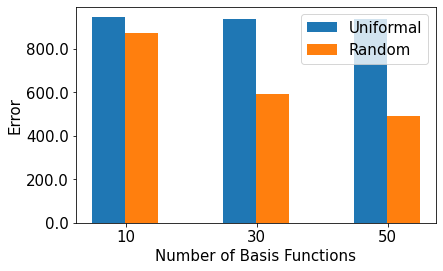

In [25]:
import numpy as np
import matplotlib.pyplot as plt

names = ["10", "30", "50"]

X = np.arange(3)
fig = plt.figure(figsize = (5,3))
ax = fig.add_axes([0,0,1,1])
# ax.bar(X + 0.00, errors[0], width = 0.25, label = "K-means")
ax.bar(X + 0.25, errors[1], width = 0.25, label = "Uniformal")
ax.bar(X + 0.5, errors[2], width = 0.25, label = "Random")


x = np.arange(len(names))+0.38  # the label locations
ax.set_xticks(x)
ax.set_xticklabels(names,  fontsize =15)
ax.set_yticklabels(np.linspace(0, 1000, 6), rotation=0, fontsize=15)

plt.legend(fontsize = 15)
plt.ylabel("Error",fontsize = 15)
plt.xlabel("Number of Basis Functions",fontsize = 15)

## NUMBER OF BASIS FUNCTIONS

In [202]:
def tabular(U, kmeans, J):    
    import gym
    import numpy as np
    env_name = "MountainCar-v0"
    env = gym.make(env_name)
    obs = env.reset()
#     env.render()
    # Some initializations
    #
    n_states = 40
    episodes = 10
    initial_lr = 1.0
    min_lr = 0.005
    gamma = 0.99
    max_stps = 300
    epsilon = 0.05
    env = env.unwrapped
#     env.seed()
#     np.random.seed(0)
    
    
    wopt = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) @ y
#     print("in func", np.linalg.norm(y-np.dot(U,wopt)))
    # Quantize the states
    #
    #print(wopt.shape)


    obs = env.reset()

    step = 0
    while step < 400:
        pos, vel = discretization(env, obs)
        states = np.array([pos, vel])
        U_in = []
        
        for j in range(J):
            U_in.append(np.exp(-0.5 *np.linalg.norm(states - kmeans[j])/sig))

        a = np.argmax(U_in@wopt)

#         a = np.argmax(df_values.loc[df_values["pos"] == pos].loc[df_values["vel"] ==vel].value)
        obs, reward, terminate,_ = env.step(a)
    
        step += 1
        if terminate:
            env.close()
            return(step, np.linalg.norm(y-np.dot(U,wopt)))
            break
    env.close()
    return(step, np.linalg.norm(y-np.dot(U,wopt)))
        

In [225]:
res = []
y =  df_values.values[:, -3:]
for clusters in [ 5, 10, 20, 30, 40, 50]:
    res_cl = []
    for iters in range(100):
        U, kmeans = random_means(clusters)
        wopt = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) @ y
        result = tabular(U, kmeans, clusters)
        res_cl.append(result)
        print("CLUSTER CENTERS: ", clusters, "Iter: ", iters, "/", 100, "Res: ", result)
    res.append(res_cl)

CLUSTER CENTERS:  5 Iter:  0 / 100 Res:  (90, 1039.8827952622867)
CLUSTER CENTERS:  5 Iter:  1 / 100 Res:  (163, 1418.3621115861993)
CLUSTER CENTERS:  5 Iter:  2 / 100 Res:  (168, 1050.4270476390063)
CLUSTER CENTERS:  5 Iter:  3 / 100 Res:  (400, 1879.5149850626233)
CLUSTER CENTERS:  5 Iter:  4 / 100 Res:  (400, 972.7000265606389)
CLUSTER CENTERS:  5 Iter:  5 / 100 Res:  (178, 1109.0273605394232)
CLUSTER CENTERS:  5 Iter:  6 / 100 Res:  (93, 1024.4235296381505)
CLUSTER CENTERS:  5 Iter:  7 / 100 Res:  (159, 1393.4029701873365)
CLUSTER CENTERS:  5 Iter:  8 / 100 Res:  (176, 1245.34145453854)
CLUSTER CENTERS:  5 Iter:  9 / 100 Res:  (400, 1072.0295388530333)
CLUSTER CENTERS:  5 Iter:  10 / 100 Res:  (400, 1337.6277818315152)
CLUSTER CENTERS:  5 Iter:  11 / 100 Res:  (400, 1035.5359260357636)
CLUSTER CENTERS:  5 Iter:  12 / 100 Res:  (122, 1012.7396729149004)
CLUSTER CENTERS:  5 Iter:  13 / 100 Res:  (400, 1244.9489176955778)
CLUSTER CENTERS:  5 Iter:  14 / 100 Res:  (400, 1329.1873662708

In [226]:
sim11 = np.array(res) # [5, 15, 20, 25] [10, 30, 50, 100, 500]  [15, 20]
np.save("sim11_random.npy", sim11)#6 : uniform at 25        5:[5, 10, 15, 20, 25, 30, 50, 100, 500] # 9:[10, 20, 30, 40, 50]

## Analysis

In [208]:
# sim5 = np.load("sim5.npy")
# sim6 = np.load("sim6uniformmeans.npy")
# sim7 = np.load("sim7randommeans.npy")

In [209]:
#  len(np.where(sim6[0][:, 0] != 1000)[0])/0.5, [len(np.where(sim7[0][:, 0] != 1000)[0])/0.5], 25

In [210]:
# plt.bar([1,2,3], [len(np.where(sim11[0][:, 0] != 1000)[0])/0.5, len(np.where(sim11[0][:, 0] != 1000)[0])/0.5, 17])
# ax = plt.gca()
# ax.set_xticks([1,2, 3])
# ax.set_xticklabels(["Uniformly Sampled", "Randomly Sampled", "K-means"],  rotation = 45)
# plt.xlabel("Way of generating means")
# plt.ylabel("Percentage of success (%)")

In [223]:
sim11.shape

(6, 50, 2)

Text(0, 0.5, 'Percentage of Successful Runs (%) ')

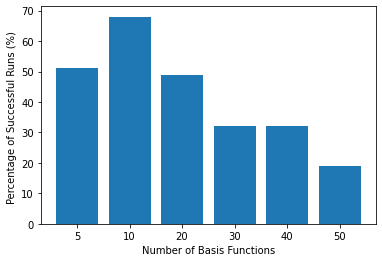

In [227]:
# plt.bar([1,2,3,4,5,6,7,8,9], [15, 5, 30, 25, 15,30.0, 25.0, 15.0, 15.0 ])
plt.bar([ 1,2,3,4,5,6], [len(np.where(sim11[i][:, 0] != 400)[0])  for i in range(len(sim11))])
ax = plt.gca()
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels( [ 5,10, 20, 30, 40, 50])
plt.xlabel("Number of Basis Functions")
plt.ylabel("Percentage of Successful Runs (%) ")

Text(0, 0.5, 'Average Number of Steps')

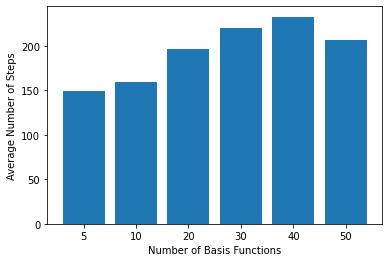

In [228]:
# plt.bar([1,2,3,4,5], [np.mean(sim[i][:, 0]) for i in range(len(sim))])
# plt.bar([1,5,2,3,4, 6,7,8,9], [np.mean(sim[i][:, 0]) for i in range(len(sim2))] + [np.mean(sim[i][:, 0]) for i in range(len(sim))])
plt.bar([ 1,2,3,4,5,6], [np.mean(sim11[i][:, 0][np.where(sim11[i][:, 0] != 400)])  for i in range(len(sim11))])
ax = plt.gca()
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels([ 5,10, 20, 30, 40, 50])
plt.xlabel("Number of Basis Functions")
plt.ylabel("Average Number of Steps")

Text(0, 0.5, 'Average Number of Steps')

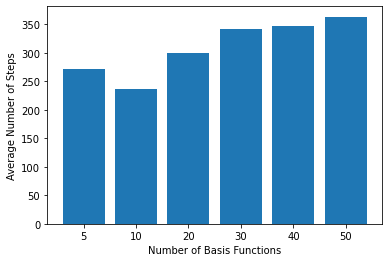

In [229]:
# plt.bar([1,2,3,4,5], [np.mean(sim[i][:, 0]) for i in range(len(sim))])
plt.bar([1,2,3,4,5,6], [np.mean(sim11[i][:, 0]) for i in range(len(sim11))])
# plt.bar([ 1,2,3,4,5,6,7], [np.mean(sim8[i][:, 0][np.where(sim8[i][:, 0] != 1000)])  for i in range(len(sim8))])
ax = plt.gca()
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels([5, 10, 20, 30, 40, 50])
plt.xlabel("Number of Basis Functions")
plt.ylabel("Average Number of Steps")

Text(0, 0.5, 'Average Error')

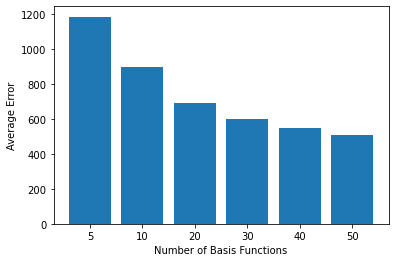

In [231]:
# plt.bar([1,2,3,4,5], [np.mean(sim[i][:, 1]) for i in range(len(sim))])
plt.bar([ 1,2,3,4,5,6], [np.mean(sim11[i][:, 1])  for i in range(len(sim11))])
ax = plt.gca()
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels([5, 10, 20, 30, 40, 50])
plt.xlabel("Number of Basis Functions")
plt.ylabel("Average Error")

In [51]:
X = df_values.values[:, :-3]
sig = np.std(X)

In [52]:
sig

11.543396380615196

# COMPARING ALL THE ALGORITHMS

In [20]:
df_values = pd.read_csv("data1000eps2.csv", index_col = 0)

In [21]:
df_values.shape

(1600, 5)

In [22]:
table = []
for i in range(len(df_values)):
    for j in range(3):
        table.append([df_values.values[i][0], df_values.values[i][1], j, df_values.values[i][j]])

In [23]:
df_values = pd.DataFrame(table)

In [24]:
df_values.shape

(4800, 4)

In [25]:
df_values.head()

,0,1,2,3
0,0.0,0.0,0,0.0
1,0.0,0.0,1,0.0
2,0.0,0.0,2,0.0
3,0.0,1.0,0,0.0
4,0.0,1.0,1,1.0


In [29]:
def get_means(J):
#     print(df_values.shape)
    X = df_values.values[:, :-1] #state space is the position, velocity and action
    means = []
#     print(X.shape)
    N = len(df_values)
    sig = np.std(X)
    
    for i in range(3):
        means.append(np.linspace(X[:, i].min(), X[:, i].max(), J))
    means  = np.array(means).T
    
    U = np.zeros((N,J))

    for i in range(N):
        for j in range(J):
            U[i][j] = np.exp(-0.5 *np.linalg.norm(X[i] - means[j])/(sig))
    
    return(U, means)

In [30]:
J = 10
U, kmeans = get_means(J)

In [31]:
X.shape

(1600, 2)

In [32]:
X = df_values.values[:, :-1] #vector of actions
sig = np.std(X)

In [33]:
def RBF(pos, vel, w):
    vals = []
    for act in range(3):
        U = []
        states = np.array([pos, vel, act])
        for j in range(J):
            U.append(np.exp(-0.5 *np.linalg.norm(states - kmeans[j])/sig))
        vals.append(U @ w)
    return(vals)

In [34]:
def evaluate_a(pos, vel, a, w):
    states = np.array([pos, vel, a])
    U = []
    for j in range(J):
            U.append(np.exp(-0.5 *np.linalg.norm(states - kmeans[j])/sig))
#     print(U.shape, w.shape)
    return(U @ w, U)

In [35]:
print(sig)

12.849556844930921


In [36]:
U

array([[1.        , 0.78771526, 0.62049533, ..., 0.18818492, 0.14823613,
        0.11676786],
       [0.96183549, 0.78633313, 0.62038599, ..., 0.18836512, 0.14838648,
        0.11689145],
       [0.92512752, 0.78013124, 0.61831979, ..., 0.18837461, 0.1484192 ,
        0.11693268],
       ...,
       [0.11693268, 0.1484192 , 0.18837461, ..., 0.61831979, 0.78013124,
        0.92512752],
       [0.11689145, 0.14838648, 0.18836512, ..., 0.62038599, 0.78633313,
        0.96183549],
       [0.11676786, 0.14823613, 0.18818492, ..., 0.62049533, 0.78771526,
        1.        ]])

## Q-Learning

In [37]:
X

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  2.],
       ...,
       [39., 39.,  0.],
       [39., 39.,  1.],
       [39., 39.,  2.]])

In [38]:
U.shape, X.shape, means.shape

((4800, 10), (4800, 3), (100, 2))

In [39]:
import gym
import numpy as np
env_name = "MountainCar-v0"
env = gym.make(env_name)
obs = env.reset()

# Some initializations
#
n_states = 40
episodes = 50
initial_lr = 1.0
min_lr = 0.005
gamma = 0.99
max_stps = 300
epsilon = 0.05
env = env.unwrapped
env.seed()
np.random.seed(0)

def discretization(env, obs):
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_den = (env_high - env_low)# / n_states
    pos_den = env_den[0]
    vel_den = env_den[1]
    pos_high = env_high[0]
    pos_low = env_low[0]
    vel_high = env_high[1]
    vel_low = env_low[1]
    pos_scaled =(obs[0] - pos_low) / pos_den   #int((obs[0] - pos_low) / pos_den)
    vel_scaled = (obs[1] - vel_low) / vel_den#int((obs[1] - vel_low) / vel_den)
    return(pos_scaled, vel_scaled)

q_table = np.zeros((n_states, n_states, env.action_space.n))
total_steps = []


w = np.random.rand(J, 1)
for episode in range(episodes):
    
    # by solving bellmans equations for a number of episodes we can optain a value function of that policy at every state
    # we can improve the policy (what is the action im going to take given a state)
    
    print("Episode:", episode)
    obs = env.reset()
    total_reward = 0
    alpha = max(min_lr, initial_lr*(gamma**(episode/0.1)))# max(min_lr, initial_lr*(gamma**(episode//100)))

#     alpha = 0.1
    steps = 0
    while True:
#         if steps % 5000 == 0:  
#             print(steps)
        pos, vel = discretization(env, obs)
        
        if np.random.uniform(low=0, high=1) < epsilon:
            a = np.random.choice(env.action_space.n)
            a_value, U = evaluate_a(pos, vel, a, w)
        else:
            a = np.argmax(RBF(pos, vel, w))
            a_value, U = evaluate_a(pos, vel, a, w)
            
        obs, reward, terminate,_ = env.step(a)
        total_reward += abs(obs[0]+0.5)
        pos_, vel_ = discretization(env, obs)
        
        states = np.array([pos, vel, a])
        
    
        max_val = np.max(RBF(pos_,vel_, w)) #random thing for sarsa
        
        # Q function update
#         print( (alpha * (reward + gamma*max_val - a_value) * U).shape)
        w += (alpha * (reward + gamma*max_val - a_value) * U).reshape(J,1)
#         w += (1-alpha)*a_value + alpha*(reward+gamma*max_val)
        
        steps += 1
        if terminate:
            total_steps.append(steps)
            print(steps)
            break
# while True:
#     env.render()

Episode: 0
13120
Episode: 1
3122
Episode: 2
23552
Episode: 3
20360
Episode: 4
18907
Episode: 5
12820
Episode: 6
7177
Episode: 7
27719
Episode: 8
9636
Episode: 9
452
Episode: 10
4983
Episode: 11
7226
Episode: 12
1362
Episode: 13
217
Episode: 14


KeyboardInterrupt: 

In [48]:
w_qlearning = w

In [52]:
U, kmeans = get_means(J)

In [101]:
X.shape, U.shape

((4800, 3), (4800, 20))

In [102]:
df_values.shape

(4800, 4)

In [143]:
tabular_tab = np.zeros([40,40])

step = 0
for i in range(40):
    for j in range(40):

        tabular_tab[i][j] = np.argmax(df_values.values[step*3: step*3+3][-1])
        step += 1

In [144]:
qlearning_tab = np.zeros([40,40])
# a_label = ["move left", "move right", "stay still"]
step = 0
for i in range(40):
    for j in range(40):
#         print(step*3, step*3+3)
        qlearning_tab[i][j] = np.argmax(U[step*3: step*3+3] @ w_qlearning)
        step += 1

In [190]:
import matplotlib.patches as mpatches

C:\Users\DIEGO UNZUETA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


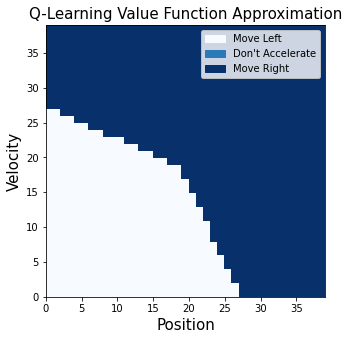

In [210]:
plt.figure(figsize = (5,5))

cmap = plt.cm.get_cmap('Blues', 8) 
plt.pcolor(range(40), range(40), qlearning_tab[::-1, ::-1], cmap = cmap)
plt.xlabel("Position", fontsize = 15)
plt.ylabel("Velocity", fontsize = 15)
plt.title("Q-Learning Value Function Approximation", fontsize = 15)


bound = np.linspace(0, 2, 4)
# Preparing borders for the legend
bound_prep = np.round(bound * 7, 2)
plt.legend([mpatches.Patch(color=cmap(b)) for b in bound[:-1]],
           [labels[i] for i in range(3)])

In [155]:
indices_one = tabular_tab == 0
indices_zero = tabular_tab == 2
tabular_tab[indices_one] = 2 # replacing 1s with 0s
tabular_tab[indices_zero] = 0

In [206]:
labels = ["Move Left", "Don't Accelerate", "Move Right"]

C:\Users\DIEGO UNZUETA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


<Figure size 360x360 with 0 Axes>

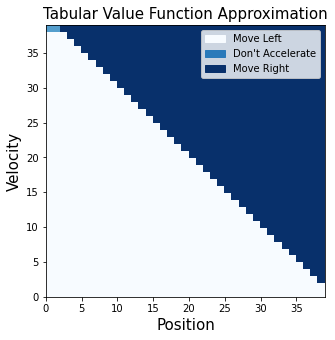

In [207]:
plt.figure(figsize = (5,5))

cmap = plt.cm.get_cmap('Blues', 8) 

plt.figure(figsize = (5,5))
plt.pcolor(range(40), range(40), tabular_tab[::-1], cmap   = cmap)
plt.xlabel("Position", fontsize = 15)
plt.ylabel("Velocity", fontsize = 15)
plt.title("Tabular Value Function Approximation", fontsize = 15)

bound = np.linspace(0, 2, 4)
# Preparing borders for the legend
bound_prep = np.round(bound * 7, 2)
plt.legend([mpatches.Patch(color=cmap(b)) for b in bound[:-1]],
           [labels[i] for i in range(3)])

In [154]:
tabular_tab

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       ...,
       [2., 2., 2., ..., 2., 0., 0.],
       [2., 2., 2., ..., 2., 2., 0.],
       [2., 2., 2., ..., 2., 2., 2.]])

In [139]:
qlearning_tab

array([[1., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.]])

## SARSA

In [157]:
import gym
import numpy as np
env_name = "MountainCar-v0"
env = gym.make(env_name)
obs = env.reset()
env.render()
# Some initializations
#
n_states = 40
episodes = 50
initial_lr = 1.0
min_lr = 0.005
gamma = 0.99
max_stps = 300
epsilon = 0.05
env = env.unwrapped
env.seed()
np.random.seed(0)

def discretization(env, obs):
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_den = (env_high - env_low)# / n_states
    pos_den = env_den[0]
    vel_den = env_den[1]
    pos_high = env_high[0]
    pos_low = env_low[0]
    vel_high = env_high[1]
    vel_low = env_low[1]
    pos_scaled =(obs[0] - pos_low) / pos_den   #int((obs[0] - pos_low) / pos_den)
    vel_scaled = (obs[1] - vel_low) / vel_den#int((obs[1] - vel_low) / vel_den)
    return(pos_scaled, vel_scaled)

q_table = np.zeros((n_states, n_states, env.action_space.n))
sarsa_steps = []


w = np.random.rand(J, 1)
for episode in range(episodes):
    
    # by solving bellmans equations for a number of episodes we can optain a value function of that policy at every state
    # we can improve the policy (what is the action im going to take given a state)
    
    print("Episode:", episode)
    obs = env.reset()
    total_reward = 0
    alpha = max(min_lr, initial_lr*(gamma**(episode/0.1)))# max(min_lr, initial_lr*(gamma**(episode//100)))

#     alpha = 0.1
    steps = 0
    while True:
#         if steps % 100 == 0:  
#             env.render()
        pos, vel = discretization(env, obs)
        
        if np.random.uniform(low=0, high=1) < epsilon:
            a = np.random.choice(env.action_space.n)
            a_value, U = evaluate_a(pos, vel, a, w)
        else:
            a = np.argmax(RBF(pos, vel, w))
            a_value, U = evaluate_a(pos, vel, a, w)
            
        obs, reward, terminate,_ = env.step(a)
        total_reward += abs(obs[0]+0.5)
        pos_, vel_ = discretization(env, obs)
        
        states = np.array([pos, vel, a])
        
        if np.random.uniform(low=0, high=1) < epsilon:

            next_val = np.random.choice(np.array(RBF(pos_,vel_, w)).reshape(3))
#             print(next_val)
        else:
            next_val = np.max(RBF(pos_,vel_, w)) 
        
        # Q function update
#         print( (alpha * (reward + gamma*max_val - a_value) * U).shape)
        w += (alpha * (reward + gamma*next_val - a_value) * U).reshape(J,1)
#         w += (1-alpha)*a_value + alpha*(reward+gamma*max_val)
        
        steps += 1
        if terminate:
            sarsa_steps.append(steps)
            print(steps)
            break
# while True:
#     env.render()

Episode: 0
33439
Episode: 1
20933
Episode: 2
2591
Episode: 3
2682
Episode: 4
2725
Episode: 5
521
Episode: 6
1599
Episode: 7
137
Episode: 8
9617
Episode: 9
140
Episode: 10
221
Episode: 11
2159
Episode: 12
187
Episode: 13
449
Episode: 14
165
Episode: 15
147
Episode: 16
390
Episode: 17
620
Episode: 18
1077
Episode: 19
765
Episode: 20
301
Episode: 21
1388
Episode: 22
311
Episode: 23
473
Episode: 24
154
Episode: 25
3739
Episode: 26
308
Episode: 27
2401
Episode: 28
1189
Episode: 29
3830
Episode: 30
491
Episode: 31
1460
Episode: 32
399
Episode: 33
1360
Episode: 34
491
Episode: 35
1090
Episode: 36
382
Episode: 37
139
Episode: 38
143
Episode: 39
154
Episode: 40
143
Episode: 41
1688
Episode: 42
151
Episode: 43
1330
Episode: 44
1090
Episode: 45
231
Episode: 46
1370
Episode: 47
2893
Episode: 48
483
Episode: 49
1381


In [158]:
w_sarsa = w

In [164]:
U, kmeans = get_means(J)

In [166]:
sarsa_tab = np.zeros([40,40])
# a_label = ["move left", "move right", "stay still"]
step = 0
for i in range(40):
    for j in range(40):
#         print(U[step*3:step*3+3])
        sarsa_tab[i][j] = np.argmax(U[step*3: step*3+3] @ w_sarsa)
        step += 1

C:\Users\DIEGO UNZUETA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


<Figure size 360x360 with 0 Axes>

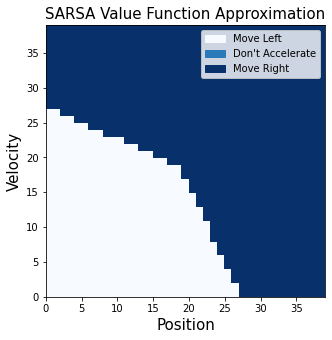

In [209]:
plt.figure(figsize = (5,5))

cmap = plt.cm.get_cmap('Blues', 8) 

plt.figure(figsize = (5,5))
plt.pcolormesh(range(40), range(40), sarsa_tab[::-1, ::-1], cmap = cmap)
plt.xlabel("Position", fontsize = 15)
plt.ylabel("Velocity", fontsize = 15)
plt.title("SARSA Value Function Approximation", fontsize = 15)
bound = np.linspace(0, 2, 4)
# Preparing borders for the legend
bound_prep = np.round(bound * 7, 2)
plt.legend([mpatches.Patch(color=cmap(b)) for b in bound[:-1]],
           [labels[i] for i in range(3)])

## Some more plots

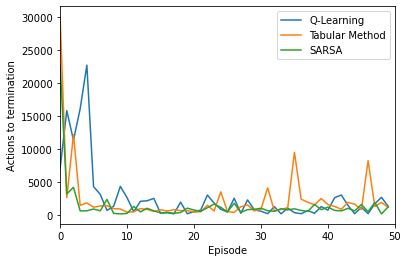

In [98]:
plt.plot(np.arange(50), total_steps, label = "Q-Learning")
plt.plot(np.arange(50), tabular_steps, label = "Tabular Method")
plt.plot(np.arange(50), sarsa_steps, label = "SARSA")
plt.xlim(0, 50)
plt.xlabel("Episode")
plt.ylabel("Actions to termination")
plt.legend()

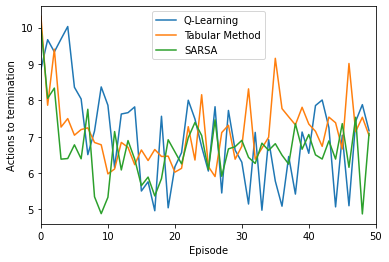

In [99]:
plt.plot(np.arange(50), np.log(total_steps), label = "Q-Learning")
plt.plot(np.arange(50), np.log(tabular_steps), label = "Tabular Method")
plt.plot(np.arange(50), np.log(sarsa_steps), label = "SARSA")
plt.xlim(0, 50)
plt.xlabel("Episode")
plt.ylabel("Actions to termination")
plt.legend()